In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import pickle
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/Dataset/'
import seaborn as sns

In [ ]:
dataset =pd.read_excel('/content/combined_dataset.xlsx')


dataset = dataset.iloc[:, :4]

In [ ]:
dataset.tail()

,comment,comment_type
42599,দেখতে দেখতে ভালবাসার এক বছর পূর্ণ হলো সবকিছুর ...,joy
42600,সিন্টারক্লাসের জন্য একটি নতুন ব্যাগ এবং বেকিং ...,surprise
42601,আমি তাকে জিজ্ঞাসা করলাম সে কি তার মূল্যবান কুক...,joy
42602,ইরানের ক্ষেপণাস্ত্রের হামলায় কয়েক ঘণ্টা পুরো ব...,fear
42603,আমি লেখক হিসাবে আমার দক্ষতার প্রতি আত্মবিশ্বাস...,joy


In [ ]:
print(dataset.shape)

(42604, 2)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
stopwords_list = 'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
def process_comments(comment):
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [ ]:
dataset['cleaned'] =  dataset['comment'].apply(process_comments)

# print some cleaned reviews from the dataset
sample_data = [10000,20000,15000,22000,25000,30000,35000]
for i in sample_data:
     print('Original:\n', dataset.comment[i],'\nCleaned:\n',
           dataset.cleaned[i],'\n')

Original:
 ক্রাউন তা এত সুন্দর কেমনে হয়নিজেকে রানী লাগছিল  অনেক কস্ট করে প্ল্যান করছে এরা কম সময়ের মধ্যে  বিয়ের আগে তোরা আমাকে এত মায়ায় ফেলতেছিস  কেন  সবকিছুর জন্য অনেক অনেক ভালবাসা আর কৃতজ্ঞতা  বইনা গুলা  স্কুল বান্ধবীর বিয়ে রাতে না থাকলে নৌকা ঘুরতে যেতাম রে বিকালে জীবনে আরেকটা সুন্দর স্মৃতি যোগ হল ভালোবাসা নিস তোরা  
Cleaned:
 ক্রাউন তা এত সুন্দর কেমনে হয়নিজেকে রানী লাগছিল  অনেক কস্ট করে প্ল্যান করছে এরা কম সময়ের মধ্যে  বিয়ের আগে তোরা আমাকে এত মায়ায় ফেলতেছিস  কেন  সবকিছুর জন্য অনেক অনেক ভালবাসা আর কৃতজ্ঞতা  বইনা গুলা  স্কুল বান্ধবীর বিয়ে রাতে না থাকলে নৌকা ঘুরতে যেতাম রে বিকালে জীবনে আরেকটা সুন্দর স্মৃতি যোগ হল ভালোবাসা নিস তোরা  

Original:
 আমি অনেক কেঁদেছি এবং এক ধরনের হতাশা বোধ করছি 
Cleaned:
 আমি অনেক কেঁদেছি এবং এক ধরনের হতাশা বোধ করছি 

Original:
   কায়লাওনাওগডেন কি দুর্দান্ত রাতটি এত দুর্দান্ত ছিল  আমরা শীঘ্রই এটি আবার বাস্তব করতে হবে       হ্যাপি থ্যাঙ্কসগিভিং 
Cleaned:
   কায়লাওনাওগডেন কি দুর্দান্ত রাতটি এত দুর্দান্ত ছিল  আমরা শীঘ্রই এটি আবার বাস্তব করতে হবে       হ্যাপি 

In [ ]:
# Length of each Reveiws
dataset['length'] = dataset['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = dataset.loc[dataset.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(dataset)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 41843


In [ ]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.comment_type.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.comment_type==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.comment_type==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.comment_type==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  joy
Number of Documents:11060
Number of Words:201935
Number of Unique Words:20497
Most Frequent Words:

আমি	10396
এবং	4220
করি	3848
আমার	3697
বোধ	3214
যে	2616
না	2211
মনে	1954
এই	1778
জন্য	1772

Class Name :  sadness
Number of Documents:9620
Number of Words:187910
Number of Unique Words:19114
Most Frequent Words:

আমি	9239
আমার	3496
না	3362
এবং	3265
করি	2914
বোধ	2859
যে	2082
করে	1591
মনে	1566
অনুভব	1473

Class Name :  surprise
Number of Documents:6285
Number of Words:106225
Number of Unique Words:17023
Most Frequent Words:

আমি	3016
আমার	1861
এবং	1440
না	1352
একটি	982
জন্য	925
যে	871
করে	851
এই	709
এটি	621

Class Name :  angry
Number of Documents:5867
Number of Words:108542
Number of Unique Words:15146
Most Frequent Words:

আমি	4323
না	1877
আমার	1653
এবং	1548
করি	1392
বোধ	1331
যে	1233
করে	1114
এই	965
মনে	766

Class Name :  disgust
Number of Documents:4641
Number of Words:98373
Number of Unique Words:10578
Most Frequent Words:

না	1918
করে	1057
এই	968
কি	907
আর	900
হয়	561

<ipython-input-12-46daabb39e01>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45);


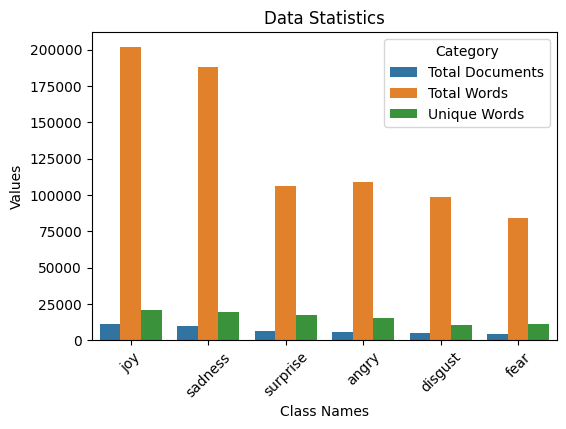

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

<ipython-input-14-1f77365cd811>:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(data=df, x='Class Names', y='Values', hue='Category', palette=palette, ax=ax)
<ipython-input-14-1f77365cd811>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45, ha='right')


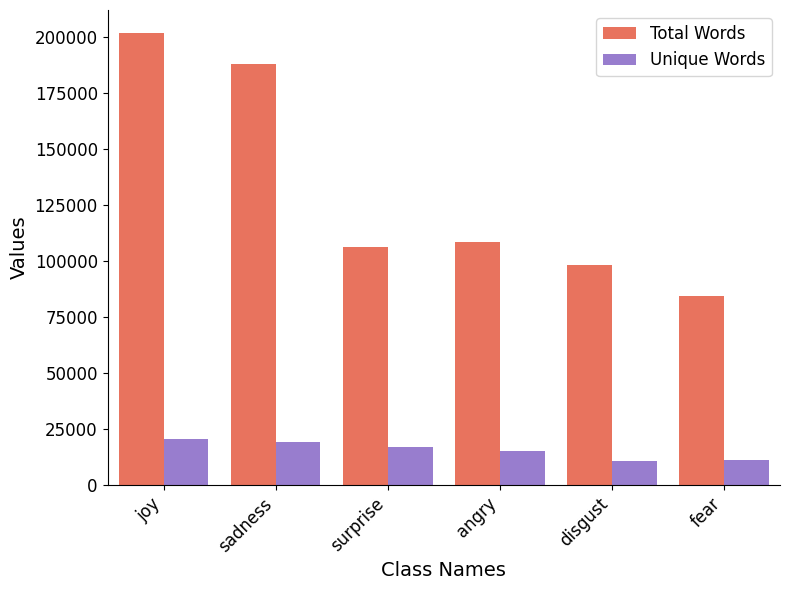

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_matrix = pd.DataFrame({'Total Words': words, 'Unique Words': u_words, 'Class Names': class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

plt.figure(figsize=(8, 6))
ax = plt.subplot()

# Set color palette
palette = ["#FF6347", "#9370DB", "#3CB371"]  # Define your desired colors

# Plot the bar plot with custom colors
sns.barplot(data=df, x='Class Names', y='Values', hue='Category', palette=palette, ax=ax)

# Customize the plot
ax.set_xlabel('Class Names', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
#ax.set_title('Data Statistics', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_ticklabels(class_names, rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')

# Remove the top and right spines
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

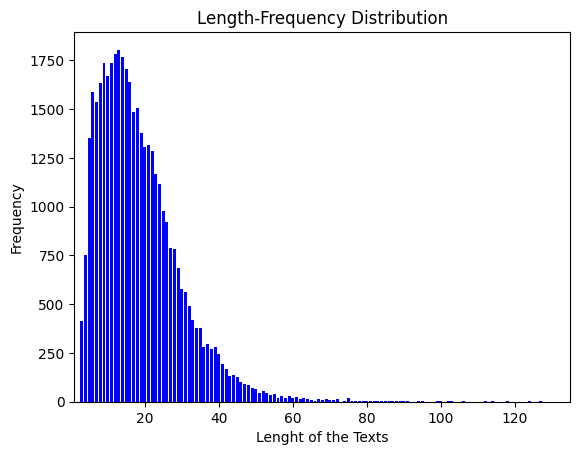

Maximum Length of a review: 479
Minimum Length of a review: 3
Average Length of a reviews: 19.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

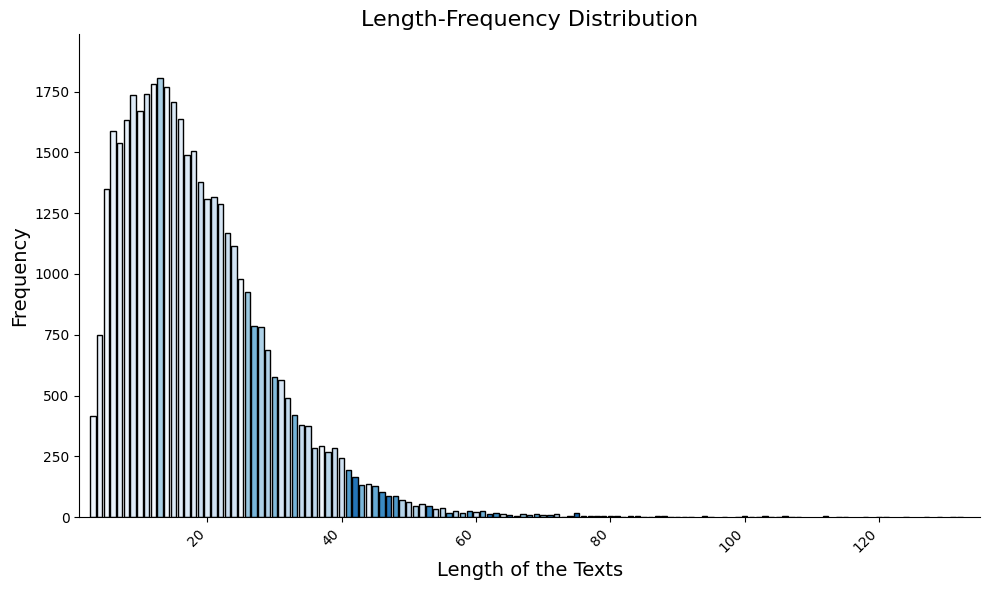

Maximum Length of a review: 479
Minimum Length of a review: 3
Average Length of a reviews: 19.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x: len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0) + 1

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot with custom colors and formatting
bar_colors = sns.color_palette("Blues", len(frequency))
bars = ax.bar(frequency.keys(), frequency.values(), color=bar_colors, edgecolor='black', linewidth=1)

# Customize the bar colors
for bar, color in zip(bars, bar_colors):
    bar.set_facecolor(color)
    bar.set_edgecolor('black')

# Set the x and y limits
ax.set_xlim(1, 135)
ax.set_ylim(0, max(frequency.values()) * 1.1)  # Add some padding to the top

# Set labels and title
ax.set_xlabel('Length of the Texts', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Length-Frequency Distribution', fontsize=16)

# Rotate the x-axis tick labels
plt.xticks(rotation=45, ha='right')

# Remove the top and right spines
sns.despine(top=True, right=True)

# Display the plot
plt.tight_layout()
plt.show()

# Print the maximum, minimum, and average length of reviews
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength), 0)}")

In [ ]:
def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [ ]:
def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test



def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features .

    Args:
        reviews: a list of cleaned reviews

    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [ ]:

                                              #============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """

    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y,),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, pos_label='positive',
                                           average='macro'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, pos_label='positive',
                                           average='macro'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='macro'),4)*100

    return my_dict

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================

def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
## save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.comment_type,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)


In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")



In [ ]:
gram_names = ['Unigram','Bigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name')
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,100])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);